# Light Curve Interpolations

Goal:  Develop a method to interpolate the light curves between observations (for now interp1d in scipy optimize should be fine and I would simply use kind = "quadratic"). As you develop this, look at the resulting light curves to see if the interpolations "make sense." If things look off then you can play with the kind for the interpolation, or send me some plots to get some additional ideas.

In [116]:
#Necessary files needed for plotting the curves and manipulating the data.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astropy as astro
from astropy.table import Table,Column
from astropy.io import ascii
plt.rcParams["figure.figsize"] = (10,8)

In [117]:
#We will need to grab the data from where it is saved on the computer.

#NS-NS
APR1215 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/APR4-1215.txt')
APR1314 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/APR4-1314.txt')
H41215 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/H4-1215.txt')
H41314 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/H4-1314.txt')
Sly135 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/Sly-135.txt')

#NS-BH
APR4Q3a75 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/APR4Q3a75.txt')
H4Q3a75 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/H4Q3a75.txt')
MS1Q3a75 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/MS1Q3a75.txt')
MS1Q7a75 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/MS1Q7a75.txt')

In [118]:
#A Merger is a data table consisting of Numbers (days and absolute magnitudes)

def truncate(merger):
    merger['u']=truncate_interp(merger['u'])
    merger['g']=truncate_interp(merger['g'])
    merger['r']=truncate_interp(merger['r'])
    merger['i']=truncate_interp(merger['i'])
    merger['z']=truncate_interp(merger['z'])
    return merger

def truncate_interp(magnitudes):
    if all(magnitude<0 for magnitude in magnitudes):
        return magnitudes
    else:
        for i in range(len(magnitudes)):
            if magnitudes[i]>0:
                magnitudes[i:] = np.inf
                return magnitudes
    return

#NS-NS
APR1215 = truncate(APR1215)
APR1314 = truncate(APR1314)
H41215 = truncate(H41215)
H41314 = truncate(H41314)
Sly135 = truncate(Sly135)

#NS-BH
APR4Q3a75 = truncate(APR4Q3a75)
H4Q3a75 = truncate(H4Q3a75)
MS1Q3a75 = truncate(MS1Q3a75)
MS1Q7a75 = truncate(MS1Q7a75)            


#abs_plotter: Merger String -> Image
#Takes the data from the Merger and plots the magnitudes of each associated photometric band as a function of time
# measured in days.
def abs_plotter(merger, name):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(merger['day'], merger['u'], 'b.', label='u')
    ax.plot(merger['day'], merger['g'], 'g.', label='g')
    ax.plot(merger['day'], merger['r'], 'y.', label='r')
    ax.plot(merger['day'], merger['i'], '.', color='orange', label='i')
    ax.plot(merger['day'], merger['z'], 'r.', label='z')
    ax.axis([0,35,rounded_up(correct_max(merger)),(rounded_down(correct_min(merger))-5)])
    plt.title("Light Curve of" + " " + name, fontsize=18)
    plt.xlabel("Time (Days)", fontsize=14)
    plt.ylabel("Absolute Magnitude", fontsize=14)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    return

#correct_max Merger -> Number
#Takes the largest non-infinite number from the whole Merger.
def correct_max(merger):
    max_list = [max(merger['u'][np.isfinite(merger['u'])]), 
                max(merger['g'][np.isfinite(merger['g'])]), 
                max(merger['r'][np.isfinite(merger['r'])]),
                max(merger['i'][np.isfinite(merger['i'])]),
                max(merger['z'][np.isfinite(merger['z'])])]
    return max(max_list)

#correct_min Merger -> Number
#Takes the smallest non-infinite number from the whole Merger.
def correct_min(merger):
    min_list = [min(merger['u'][np.isfinite(merger['u'])]), 
                min(merger['g'][np.isfinite(merger['g'])]), 
                min(merger['r'][np.isfinite(merger['r'])]),
                min(merger['i'][np.isfinite(merger['i'])]),
                min(merger['z'][np.isfinite(merger['z'])])]
    return min(min_list)

#round_up: number base -> number
#Rounds the number up to the nearest multiple of the base number.
def rounded_up(x, base=5):
    return int(base * (round(float(x)/base)+1))

#round_down: number base -> number
#Rounds the number down to the nearest multiple of the base number.
def rounded_down(x, base=5):
    return int(base * (round(float(x)/base)))

### NS-NS Mergers

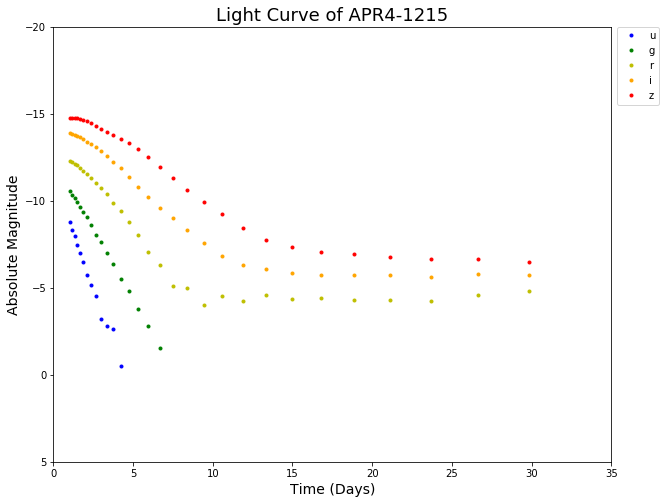

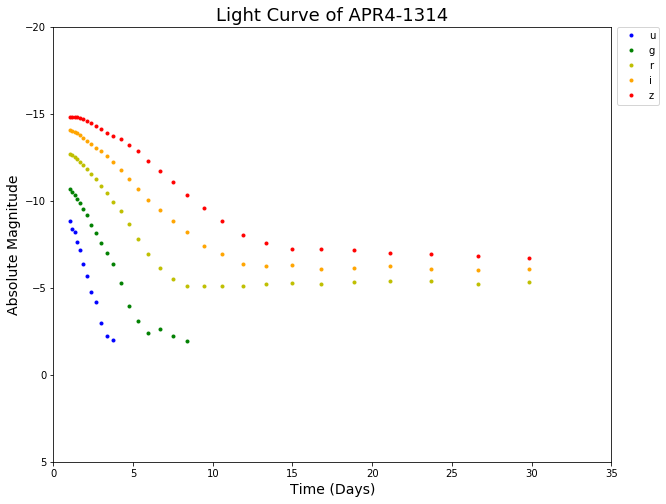

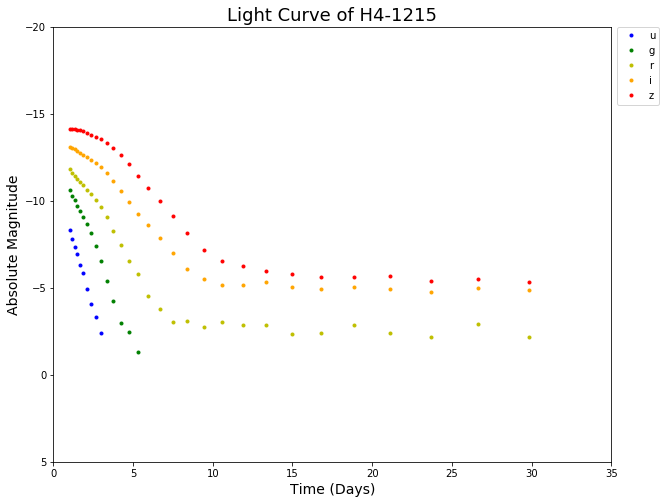

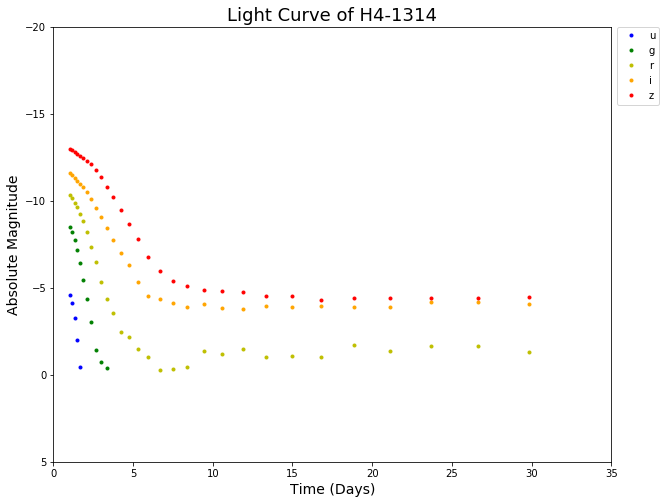

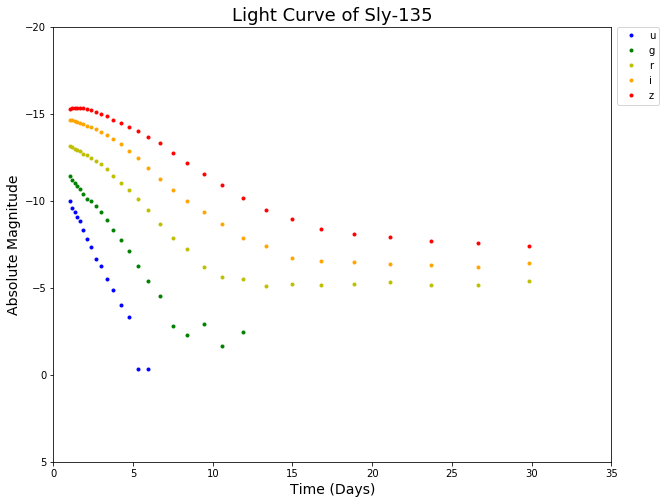

In [119]:
#The following are plots of only the data retrived from the data files in the ascii.reads.
abs_plotter(APR1215, "APR4-1215")
abs_plotter(APR1314, "APR4-1314")
abs_plotter(H41215, "H4-1215")
abs_plotter(H41314, "H4-1314")
abs_plotter(Sly135, "Sly-135")

### NS-BH Mergers

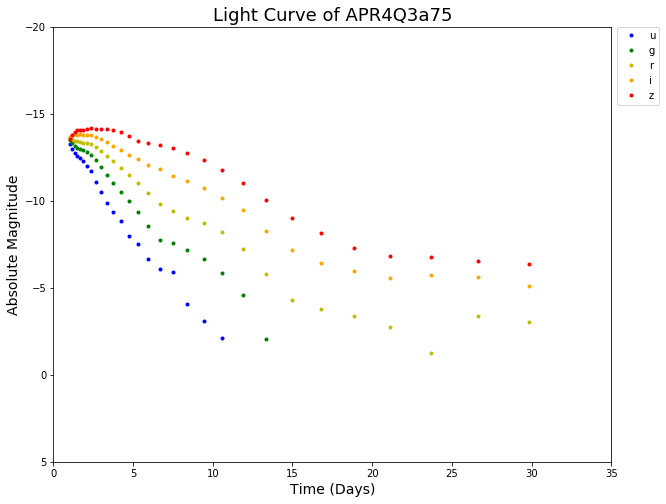

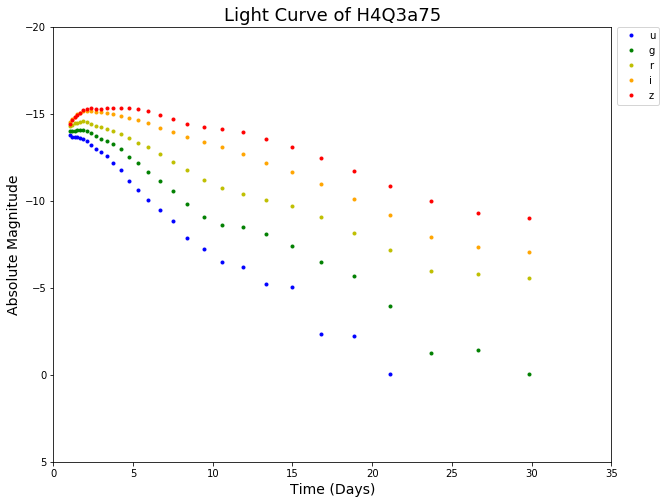

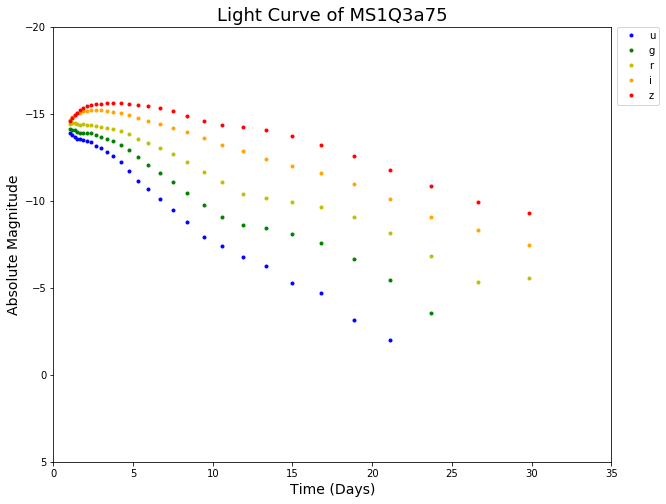

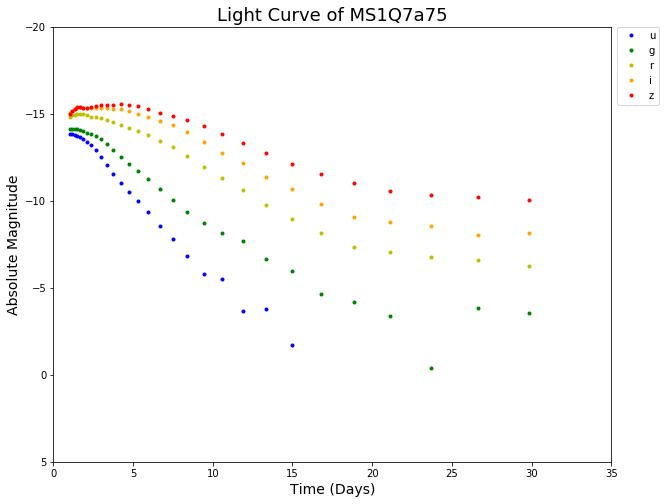

In [120]:
#The following are plots of only the data retrived from the data files in the ascii.reads.
abs_plotter(APR4Q3a75, 'APR4Q3a75')
abs_plotter(H4Q3a75, 'H4Q3a75')
abs_plotter(MS1Q3a75, 'MS1Q3a75')
abs_plotter(MS1Q7a75, 'MS1Q7a75')

In [121]:
#Next we will need to interpolate the data and plot the interpolations. We will need interp1d function from scipy.
from scipy.interpolate import interp1d

#abs_interp: Merger-> List of Interpolations
#Provides the necessary interpolation functions of the mergers in each associated photometric bands. 
def abs_interp(merger):
    approx='cubic'
    u=interp1d(merger['day'][np.isfinite(merger['u'])], merger['u'][np.isfinite(merger['u'])], kind=approx)
    g=interp1d(merger['day'][np.isfinite(merger['g'])], merger['g'][np.isfinite(merger['g'])], kind=approx)
    r=interp1d(merger['day'][np.isfinite(merger['r'])], merger['r'][np.isfinite(merger['r'])], kind=approx)
    i=interp1d(merger['day'][np.isfinite(merger['i'])], merger['i'][np.isfinite(merger['i'])], kind=approx)
    z=interp1d(merger['day'][np.isfinite(merger['z'])], merger['z'][np.isfinite(merger['z'])], kind=approx)
    return [u, g, r, i, z]

#abs_plot_interp: Merger String -> Image
#Takes the data from the Merger and plots the interpolations of each associated photometric band as a function of time
# measured in days.
def abs_plot_interp(merger, name):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    
    ax.plot(day_new(merger, 'u'), abs_interp(merger)[0](day_new(merger, 'u')),
            'b--', label='u interp.')
    
    ax.plot(day_new(merger, 'g'), abs_interp(merger)[1](day_new(merger, 'g')),
            'g--', label='g interp.')
    ax.plot(day_new(merger, 'r'), abs_interp(merger)[2](day_new(merger, 'r')),
            'y--', label='r interp.')
    ax.plot(day_new(merger, 'i'), abs_interp(merger)[3](day_new(merger, 'i')),
            '--', color='orange', label='i interp.')
    ax.plot(day_new(merger, 'z'), abs_interp(merger)[4](day_new(merger, 'z')),
            'r--', label='z interp.')
    ax.axis([0,35,rounded_up(correct_max(merger))+5,(rounded_down(correct_min(merger))-5)])
    plt.title("Light Curve of" + " " + name, fontsize=18)
    plt.xlabel("Time (Days)", fontsize=14)
    plt.ylabel("Absolute Magnitude", fontsize=14)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    return

#day_new Merger String -> List of Numbers
#Produces a new set of points between the range of the 'day' column in the merger data. This is useful for plotting
# the interpolations.
def day_new(merger, band):
    set_length=100
    day_new = np.linspace(min(merger['day'][np.isfinite(merger[band])]),
                          max(merger['day'][np.isfinite(merger[band])]),set_length)
    return day_new





### NS-NS Interpolations

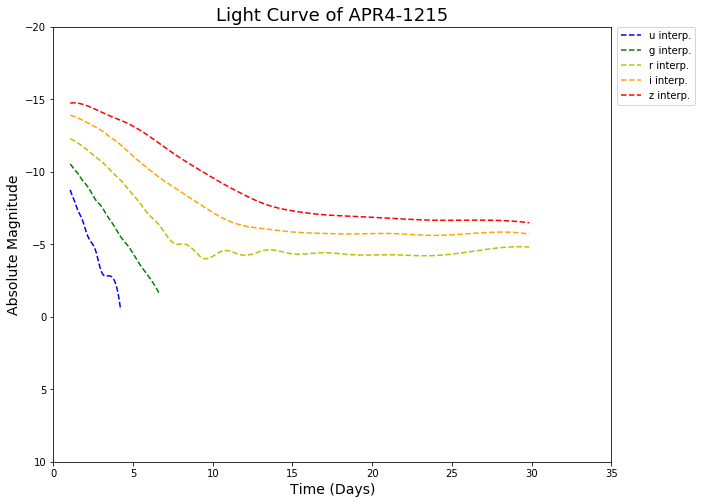

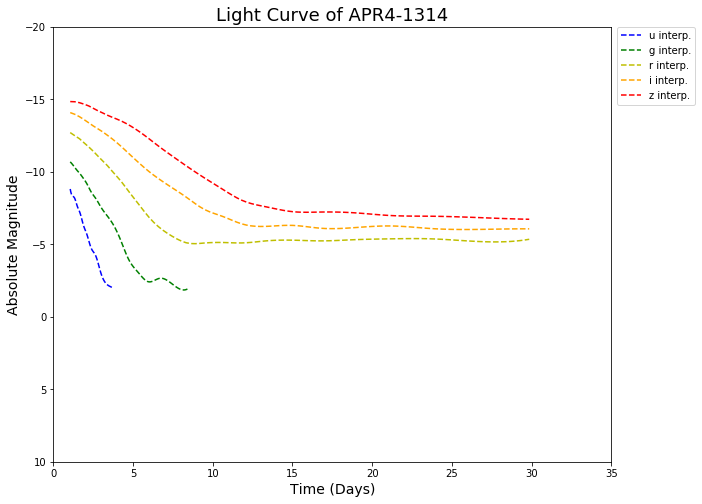

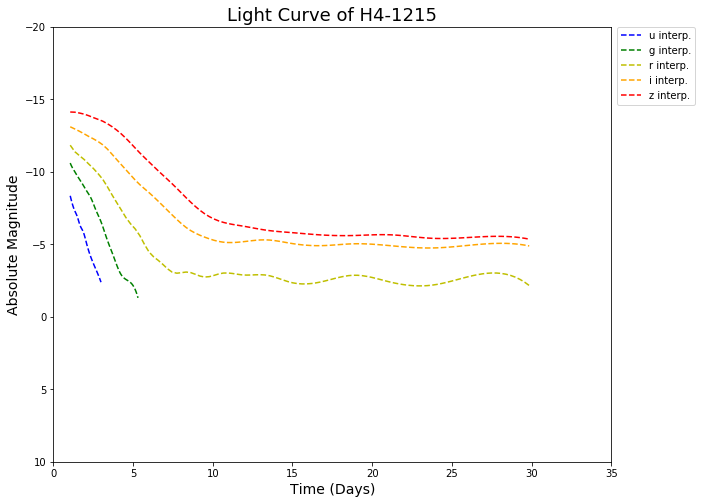

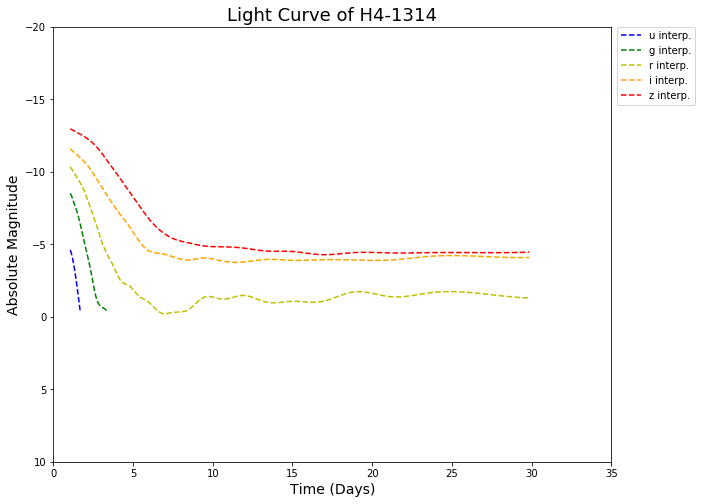

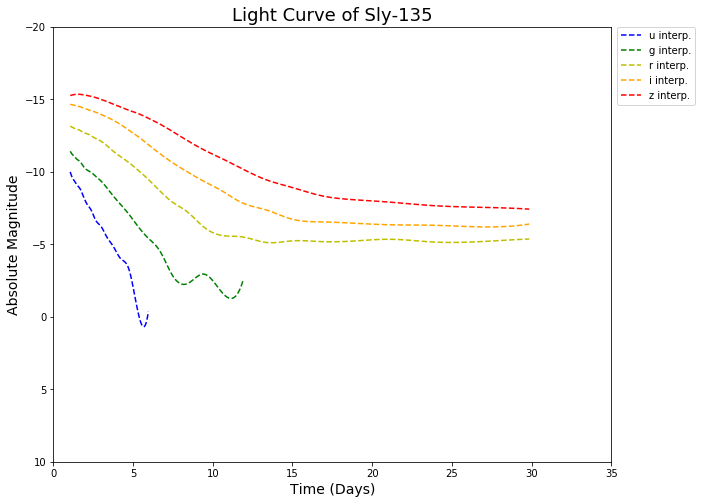

In [122]:
#The following are plots of only the interpolations.
abs_plot_interp(APR1215, "APR4-1215")
abs_plot_interp(APR1314, "APR4-1314")
abs_plot_interp(H41215, "H4-1215")
abs_plot_interp(H41314, "H4-1314")
abs_plot_interp(Sly135, "Sly-135")

### NS-BH Interpolations

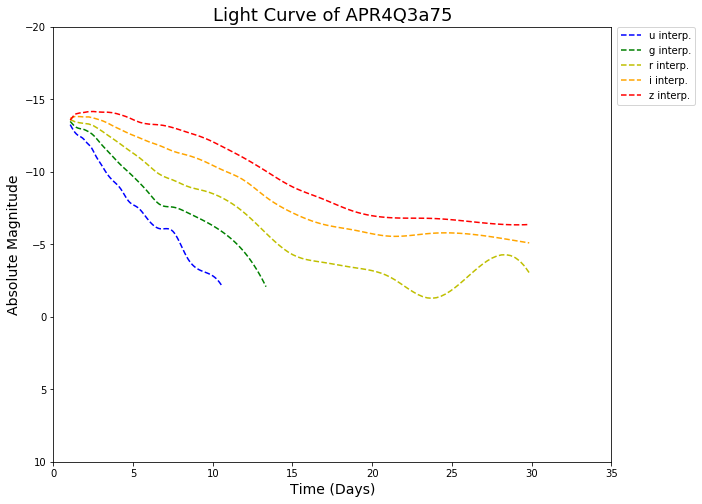

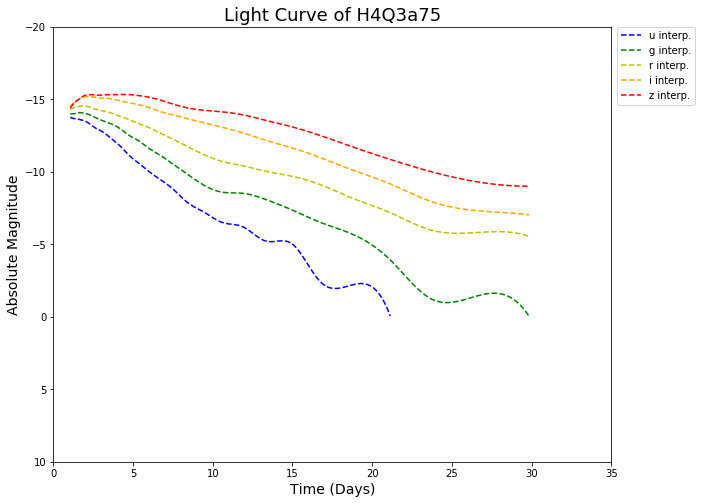

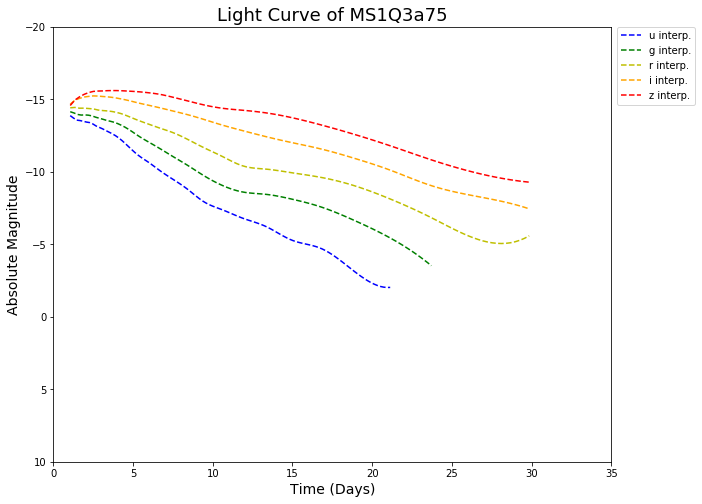

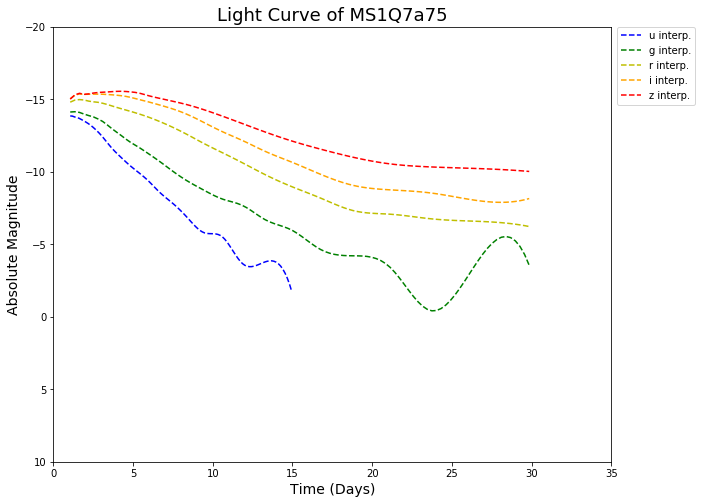

In [123]:
#The following are plots of only the interpolations.
abs_plot_interp(APR4Q3a75, 'APR4Q3a75')
abs_plot_interp(H4Q3a75, 'H4Q3a75')
abs_plot_interp(MS1Q3a75, 'MS1Q3a75')
abs_plot_interp(MS1Q7a75, 'MS1Q7a75')

## Combining the Data with the Interpolations

In [124]:
#full_plot: Merger String String -> Image
#Takes the data from the Merger and plots the magnitudes and interpolations of each associated photometric band as a
# function of time measured in days.
def full_plot(merger,name, magnitude):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    abs_plotter1(merger)
    abs_plot_interp(merger)
    ax.axis([0,35,rounded_up(correct_max(merger))+5,(rounded_down(correct_min(merger))-5)])
    plt.title("Light Curve of " + name, fontsize=18)
    plt.xlabel("Time (Days)", fontsize=14)
    plt.ylabel('Magnitude ' + magnitude, fontsize=14)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    return

#abs_plotter1 Merger -> Image
#Plots the data from the ascii.reads of the merger.
def abs_plotter1(merger):
    plot_band(merger, 'u', '.', 'b')
    plot_band(merger, 'g', '.', 'g')
    plot_band(merger, 'r', '.', 'y')
    plot_band(merger, 'i', '.', 'orange')
    plot_band(merger, 'z', '.', 'r')
    return

#plot_band: Merger String String String -> Image
#Plots the magnitudes of a photometric band in the merger.
def plot_band(merger, name, style, color):
    plt.plot(merger['day'], merger[name], style, color=color, label=name)

#abs_plotter1 Merger -> Image
#Plots the interpolations calculated from data from the ascii.reads of the merger.
def abs_plot_interp(merger):
    plot_interp(merger, 'u', '--', 'b', 0)
    plot_interp(merger, 'g', '--', 'g', 1)
    plot_interp(merger, 'r', '--', 'y', 2)
    plot_interp(merger, 'i', '--', 'orange', 3)
    plot_interp(merger, 'z', '--', 'r', 4)
    return

#plot_band: Merger String String String Number -> Image
#Plots the interpolation of a photometric band in the merger.
def plot_interp(merger, name, style, color, number):
    plt.plot(day_new(merger, name),abs_interp(merger)[number](day_new(merger, name)),
             style, color=color, label=name+' interp.')

### NS-NS Mergers Full Plots

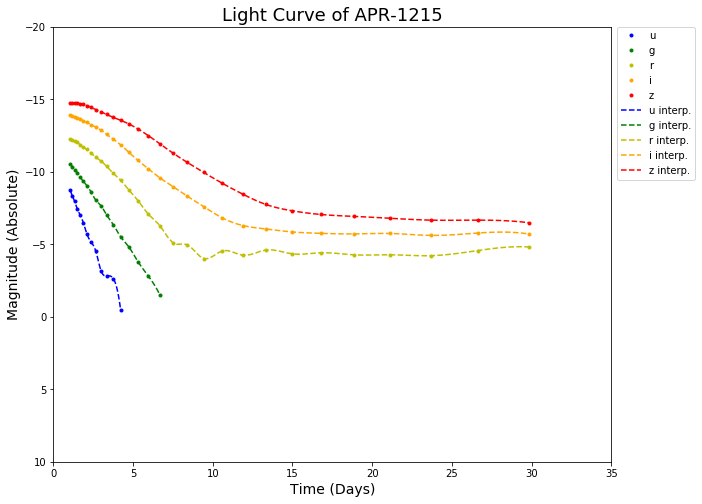

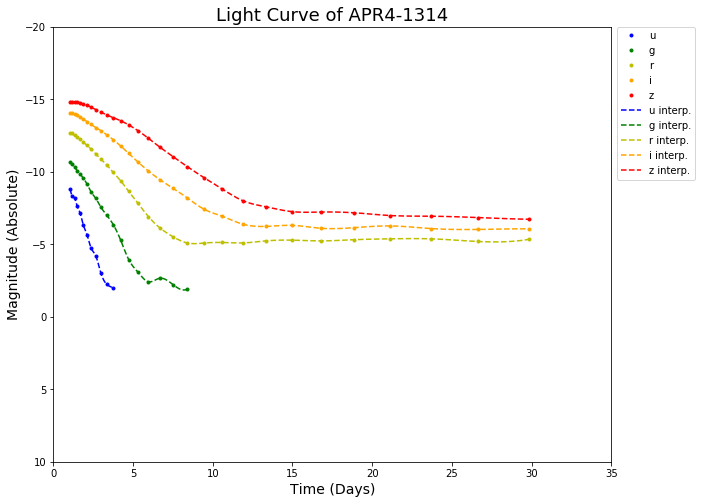

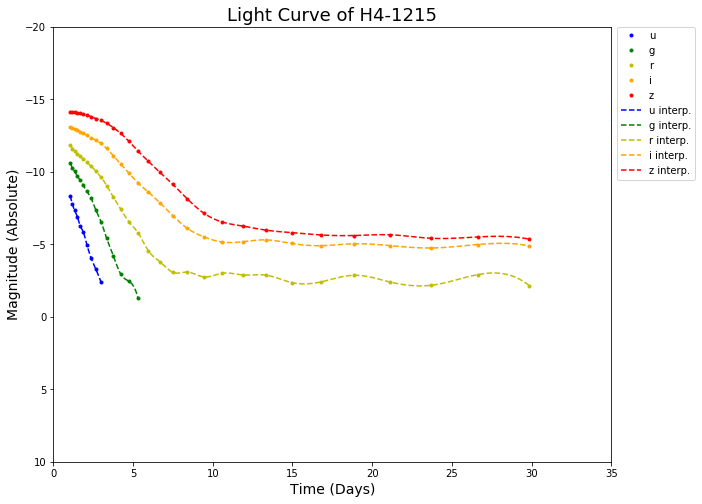

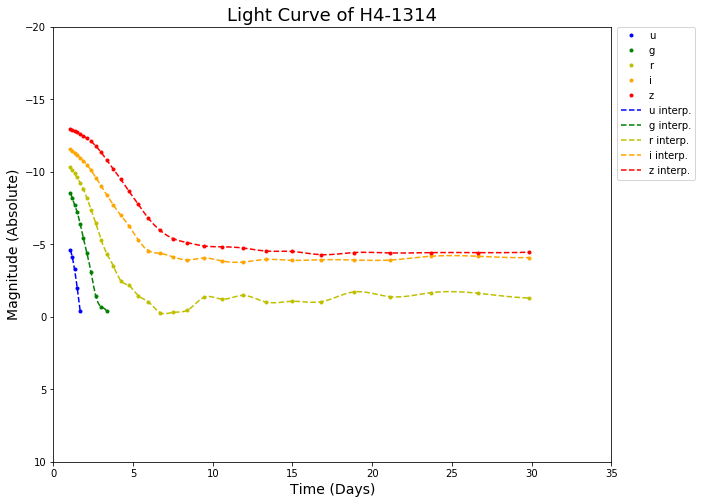

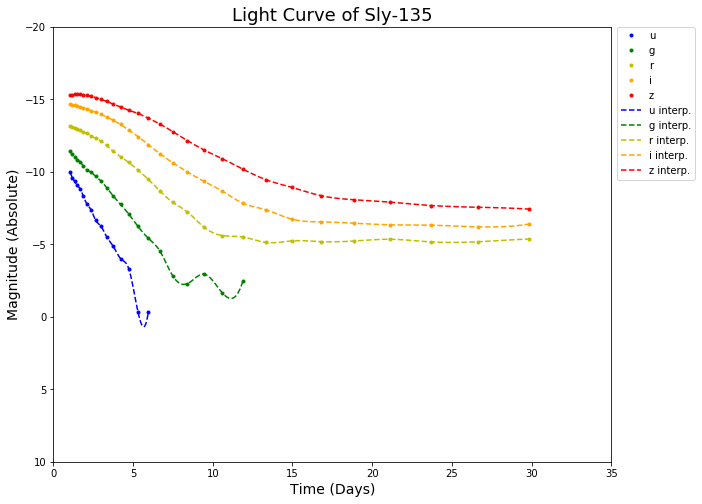

In [125]:
#The following are plots of both the data and the interpolations of the mergers in each of the photometric bands.
full_plot(APR1215, "APR-1215", "(Absolute)")
full_plot(APR1314, "APR4-1314", "(Absolute)")
full_plot(H41215, "H4-1215", "(Absolute)")
full_plot(H41314, "H4-1314", "(Absolute)")
full_plot(Sly135, "Sly-135", "(Absolute)")

### NS-BH Mergers Full Plots

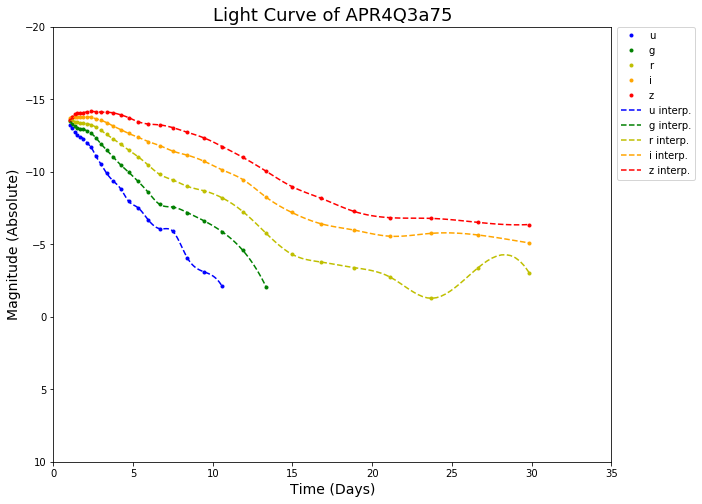

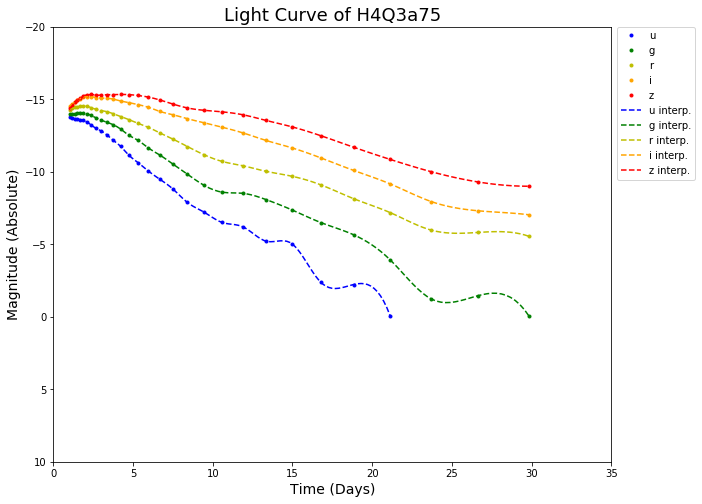

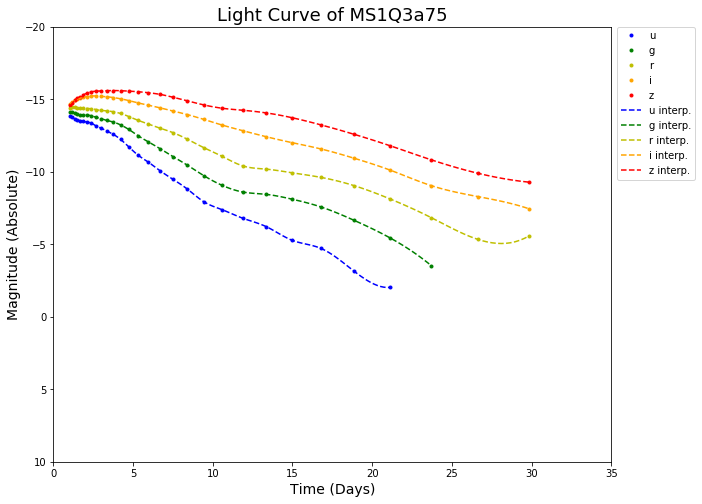

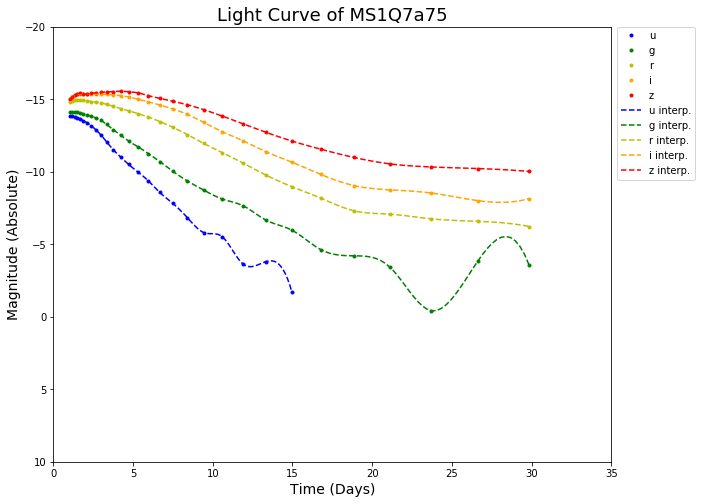

In [126]:
#The following are plots of both the data and the interpolations of the mergers in each of the photometric bands.
full_plot(APR4Q3a75, 'APR4Q3a75', "(Absolute)")
full_plot(H4Q3a75, 'H4Q3a75', "(Absolute)")
full_plot(MS1Q3a75, 'MS1Q3a75', "(Absolute)")
full_plot(MS1Q7a75, 'MS1Q7a75', "(Absolute)")

## Apparent Magnitude Light Curves (z=0.015)

In [127]:
from astropy.cosmology import WMAP9 as cosmo

#Redshift:
z=0.015
zero_app = 5*np.log10(lumo_dist(z)/10)

#app_mag: Merger Number -> Merger
#Converts the merger data from absolute magnitude to apparent magnitude.
def app_mag(merger, redshift):
    merger['u']=app_mag_band(merger['u'],redshift)
    merger['g']=app_mag_band(merger['g'],redshift)
    merger['r']=app_mag_band(merger['r'],redshift)
    merger['i']=app_mag_band(merger['i'],redshift)
    merger['z']=app_mag_band(merger['z'],redshift)
    return merger

#app_mag_band: ListofNumbers Number -> ListofNumbers
#converts all the absolute magnitudes into apparent magnitudes.
def app_mag_band(data, redshift):
    return 5*np.log10(lumo_dist(redshift)/10)+data

#lumo_dist: Number -> Number
#converts redshift to luminosity distance
def lumo_dist(redshift):
    return cosmo.luminosity_distance(redshift).to(astro.units.pc).value


#NS-NS Conversions:
APR1215_app=app_mag(APR1215, z)
APR1314_app=app_mag(APR1314, z)
H41215_app=app_mag(H41215, z)
H41314_app=app_mag(H41314, z)
Sly135_app=app_mag(Sly135, z)

#NS-BH Conversions:
APR4Q3a75_app=app_mag(APR4Q3a75, z)
H4Q3a75_app=app_mag(H4Q3a75, z)
MS1Q3a75_app=app_mag(MS1Q3a75, z)
MS1Q7a75_app=app_mag(MS1Q7a75, z)

### NS-NS Mergers

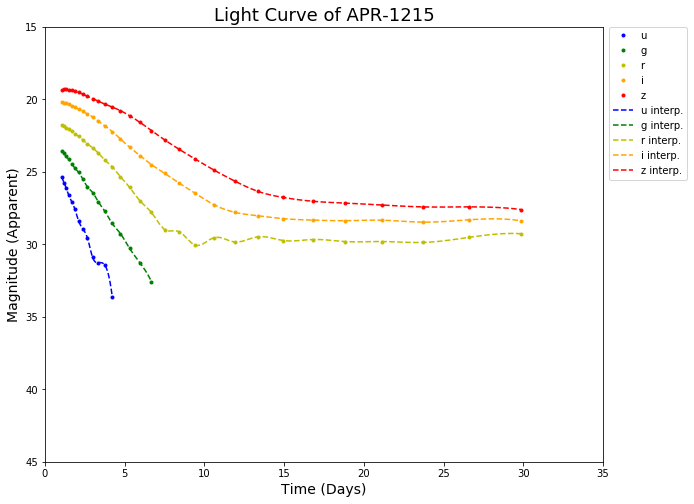

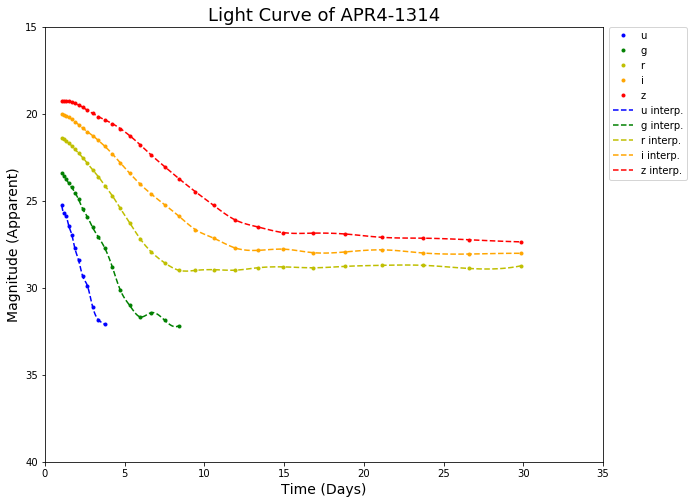

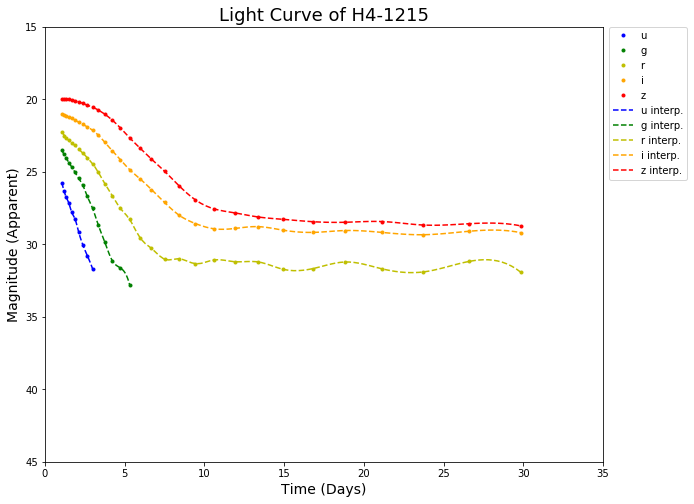

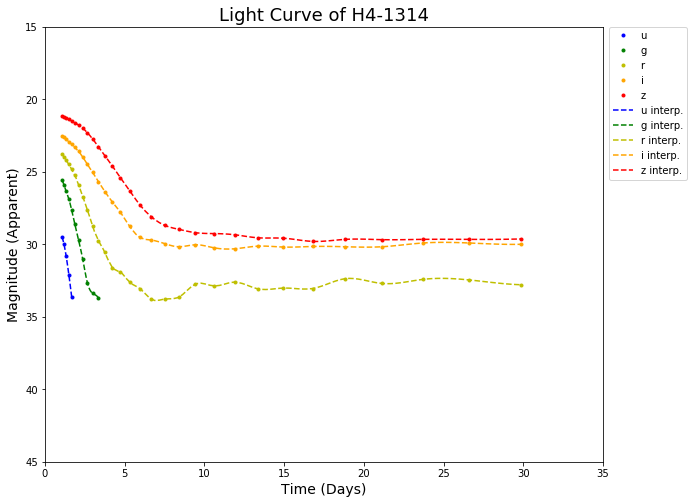

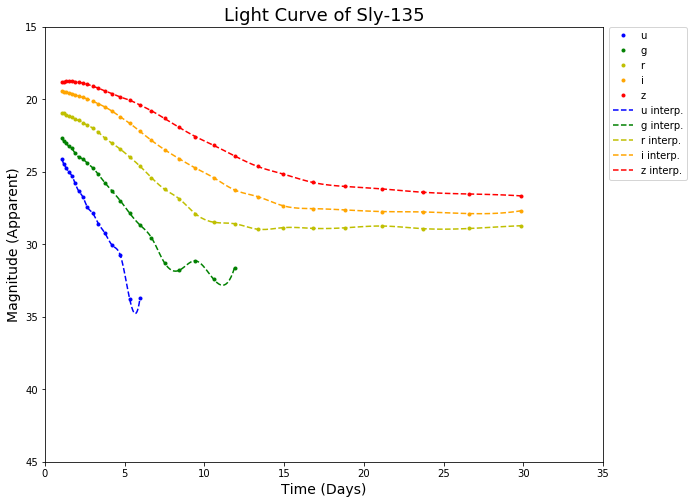

In [128]:
full_plot(APR1215_app, "APR-1215", "(Apparent)")
full_plot(APR1314_app, "APR4-1314", "(Apparent)")
full_plot(H41215_app, "H4-1215", "(Apparent)")
full_plot(H41314_app, "H4-1314", "(Apparent)")
full_plot(Sly135_app, "Sly-135", "(Apparent)")

### NS-BH Mergers

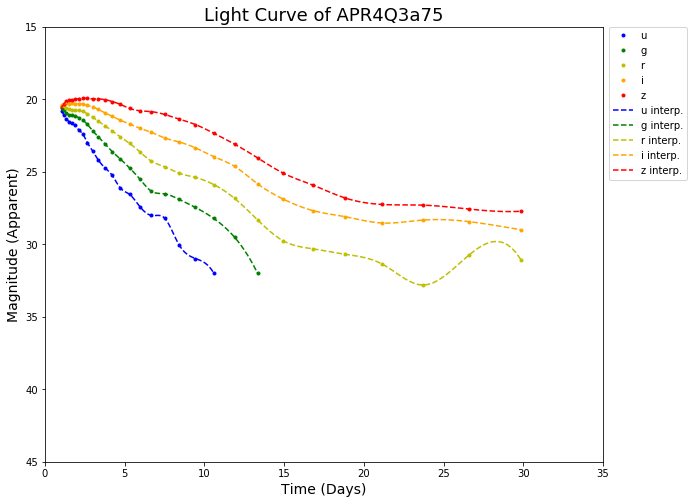

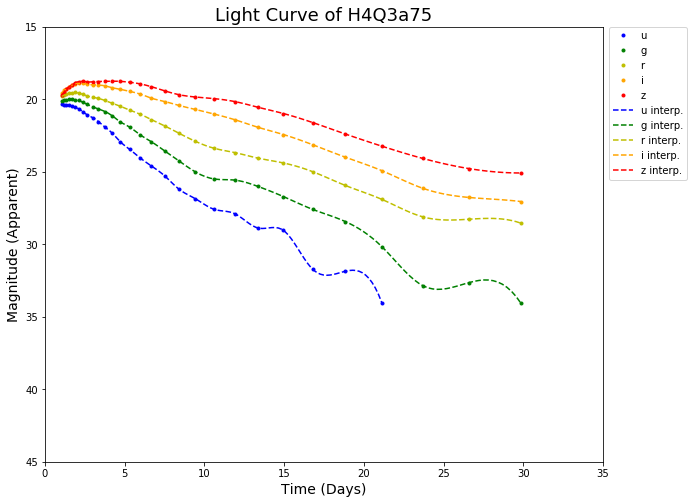

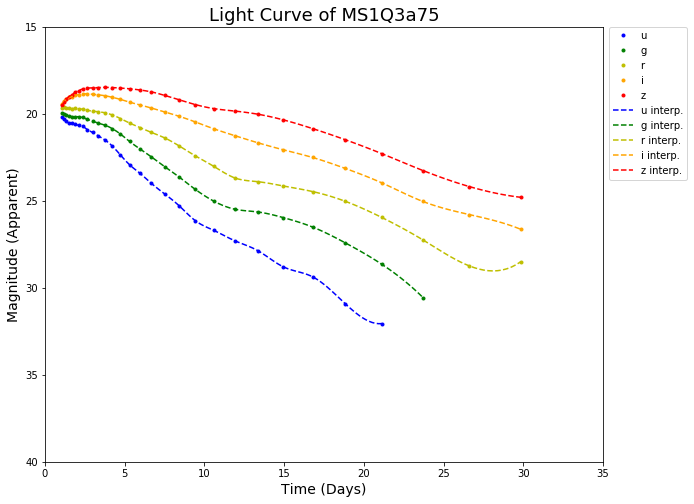

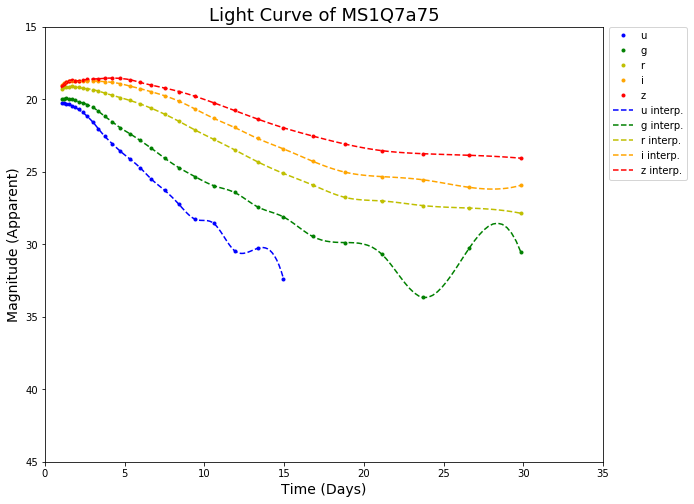

In [129]:
full_plot(APR4Q3a75_app, 'APR4Q3a75', "(Apparent)")
full_plot(H4Q3a75_app, 'H4Q3a75', "(Apparent)")
full_plot(MS1Q3a75_app, 'MS1Q3a75', "(Apparent)")
full_plot(MS1Q7a75_app, 'MS1Q7a75', "(Apparent)")